# Homework 9 (DL Monday, November 27 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023

In [92]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

#### Consider a 1D Gaussian random walk model
$$
x_k = x_{k−1} + q_{k−1}, \\
y_k = x_k + r_k,
$$

where $x_0 ∼ \mathcal{N} (0, 1), q_{k−1} ∼ \mathcal{N} (0, 1)$, and $r_k ∼ \mathcal{N} (0, 1)$.

### Part a (1 point): Simulate state and measurements from the model for 100 time steps. Plot the data.

In [93]:
def model_simulation(seed_number, steps):
    """ 
    model simulation for 1D Gaussian random walk model
    -------
    Input:
        seed_number: it is used to generate the same sequence of random numbers
        steps: number of steps
    Output:
        xs: state trajectory
        ys: measurement tajectory
        
    """
    np.random.seed(seed_number)      # do not change this line
    xs = np.zeros((steps, 1))        # do not change this line
    ys = np.zeros((steps, 1))        # do not change this line
    # To draw random samples from a normal (Gaussian) distribution, you could use np.random.normal function
    # YOUR CODE HERE
    for n in range(steps): 
        xs[n] = xs[n-1] + np.random.normal(0, 1)      
        ys[n] = xs[n] + np.random.normal(0, 1)           

    return xs, ys
    
    # raise NotImplementedError()
    return xs, ys # do not change this line
    

Feel free to uncomment and run the given code below.

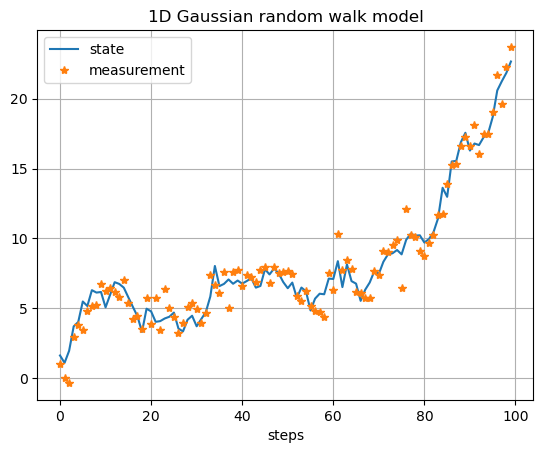

In [94]:
plt.plot(model_simulation(1, 100)[0], label='state')
plt.plot(model_simulation(1, 100)[1], '*', label='measurement')
plt.title('1D Gaussian random walk model')
plt.xlabel('steps')
plt.legend()
plt.grid();

### part b (2 points) Implement a Kalman filter for the model and plot the results.

#### Note: the input of the following "Kalman_Filter" function is only the measurements. Please do not change that and define any nesessary parameters inside the function.

#### The output should be Kalman filter means and covariances of the whole trajectory.

In [98]:
def Kalman_Filter(Y):
    """ 
    Kalman filter state estimation for 1D Gaussian random walk model
    
    -------
    Input:
        Y: measurements
    Output:
        mean_kf: Kalman filter mean estimation
        cov_kf: Kalman filter covariance estimation
        
    """
    steps = Y.shape[0]
    mean_kf = np.zeros((steps, 1))      # do not change this line
    cov_kf = np.zeros((steps, 1, 1))    # do not change this line
   
    # YOUR CODE HERE
    F = 1
    G = 1
    q = 1  
    r = 1  
    m = 1
    P = 1 
    mean_kf[0] = Y[0]
    
    for n in range(1, steps):
        x_ = F * m
        P_ = F * P * F + q
        
        S = G * P_ * G + r
        K = P_ * G / S
        P = P_ - K * S * K
        m = x_ + K * (Y[n] - G * x_)

        mean_kf[n] = m
        cov_kf[n] = P 

    #raise NotImplementedError()
    return mean_kf, cov_kf  # do not change this line

Feel free to uncomment and run the given code below.

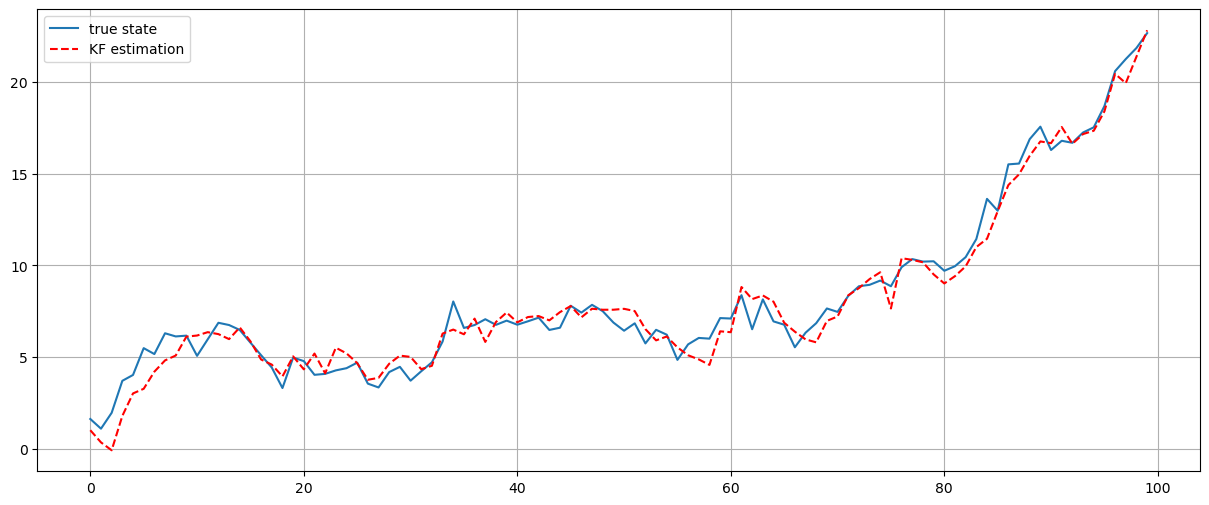

In [99]:
observations =  model_simulation(1, 100)[1]
x_kalman, cov_kalman = Kalman_Filter(observations)
plt.figure(figsize=(15,6))
plt.plot(model_simulation(1, 100)[0], label='true state')
plt.plot(x_kalman[:,0], 'r--', label='KF estimation')
plt.legend()
plt.grid();

### Part b (1 point): Compare its state estimates (= mean) in RMSE sense to using pure measurements as estimates ($x_k ≈ y_k$) for the state.

In [100]:
def rmse_comparison(true_state, kf_mean_estimation, pure_measurements):
    """ 
    RMSE comparison for 1D Gaussian random walk model using kalman filter estimates and raw measurements estimates
    
    -------
    Input:
        true_state: true states come from the model
        kf_mean: kalman filter mean estimation
        pure_measurements: measurements
    Output:
        rmse_kf: rmse of Kalman filter estimates and true states
        rmse_raw: rmse of raw measurements estimates and true states
        
    """
    # rmse_kf = ?
    # rmse_raw = ?
    # YOUR CODE HERE
    rmse_kf = np.sqrt(np.mean((true_state - kf_mean_estimation) ** 2))
    rmse_raw = np.sqrt(np.mean((true_state - pure_measurements) ** 2))
    
    #raise NotImplementedError()
    return rmse_kf, rmse_raw

true_state, pure_measurements = model_simulation(1, 100)
mean_kf, _ = Kalman_Filter(pure_measurements)

rmse_kf, rmse_raw = rmse_comparison(true_state, mean_kf, pure_measurements)

print(f"RMSE of Kalman filter estimates: {rmse_kf}")
print(f"RMSE of raw measurements: {rmse_raw}")

RMSE of Kalman filter estimates: 0.7965913601411553
RMSE of raw measurements: 0.9432367262096064
